# Intro to Mathematics with Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option('display.max_rows', 6)
# Plot settings
plt.style.use('plot_style.txt')

In this chapter, you'll learn about doing mathematics with code, including solving equations both in the abstract and numerically.

This chapter uses the **numpy**, **scipy**, and **sympy** packages. If you're running this code, you may need to install these packages using, for example, `pip install packagename` on your computer's command line. (If you're not sure what a command line or terminal is, take a quick look at the basics of coding chapter.)

## Symbolic mathematics

In [2]:
from myst_nb import glue
import sympy
a = 8
glue('sqrt', 2*np.sqrt(a))
glue('symsqrt', sympy.sqrt(a))

5.656854249492381

2*sqrt(2)

When using computers to do mathematics, we're most often performing numerical computations such as $\sqrt{8} = ${glue:}`sqrt`. Although we have the answer, it's only useful for the one special case. Symbolic mathematics allows us to use coding to solve equations in the general case, which can often be more illuminating. As an example, if we evaluate this in symbolic mathematics we get $\sqrt{8} = ${glue:}`symsqrt`.

The Python package for symbolic mathemtics is [**sympy**](https://www.sympy.org/en/index.html), which provides some features of a computer algebra system.

To define *symbolic* variables, we use sympy's symbols function. For ease, we'll import the entire sympy library into the namespace by using `from sympy import *`.

In [3]:
from sympy import *
x, t, α, β = symbols(r'x t \alpha \beta')

```{note}
The leading 'r' in some strings tells Python to treat the string literally so that backslashes are not treated as instructions--otherwise, combinations like `\n` would begin a newline.
```

Having created these symbolic variables, we can refer to and see them just like normal variables--though they're not very interesting *because* they are just symbols (for now):

In [4]:
α

\alpha

Things get much more interesting when we start to do maths on them. Let's see some integration, for example, say we want to evaluate

In [5]:
Integral(log(x), x)

Integral(log(x), x)

(note that the symbols are printed as latex equations) we simply call

In [6]:
integrate(log(x), x)

x*log(x) - x

We can differentiate too:

In [7]:
diff(sin(x)*exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

and even take limits!

In [8]:
limit(sin(x)/x, x, 0)

1

It is also possible to solve equations using **sympy**. The solve function tries to find the roots of $f(x)$ and has syntax `solve(f(x)=0, x)`. Here's an example:

In [9]:
solve(x*5 - 2, x)

[2/5]

There are also solvers for differential equations (`dsolve`), continued fractions, simplifications, and more.

Another really important thing to know about symbolic mathematics is that you can 'cash in' at any time by substituting in an actual value. For example,

In [10]:
expr = 1 - 2*sin(x)**2
expr.subs(x, np.pi/2)

-1.00000000000000

But you don't have to substitute in a real value; you can just as well substitute in a different symbolic variable:

In [11]:
expr = 1 - 2*sin(x)**2
simplify(expr.subs(x, t/2))

cos(t)

I snuck in a simplify here too!

### Symbolic mathematics for economics

The library does a lot, so let's focus on a few features that are likely to be useful for economics in particular.

#### Series expansion

The first is performing **Taylor series expansions**. These come up all the time in macroeconomic modelling, where models are frequently log-linearised. Let's see an example of a couple of expansions together:

In [12]:
expr = log(sin(α))

expr.series(α, 0, 4)

log(\alpha) - \alpha**2/6 + O(\alpha**4)

This is a 3rd order expansion around $\alpha=0$.

#### Symbolic linear algebra

The support for **matrices** can also come in handy for economic applications. Here's a matrix,

In [13]:
M = Matrix([[1, 0, x], [α, -t, 3], [4, β, 2]])
M

Matrix([
[     1,     0, x],
[\alpha,    -t, 3],
[     4, \beta, 2]])

and its determinant:

In [14]:
M.det()

\alpha*\beta*x - 3*\beta + 4*t*x - 2*t

I can hardly go to a talk in economics that involves matrices that doesn't see those matrices get diagonalised: there's a function for that too.

In [15]:
P, D = Matrix([[1, 0], [α, -t]]).diagonalize()
D

Matrix([
[1,  0],
[0, -t]])

#### Lagrangians

Function optimisation using Lagrangians is about as prevalent in economics as any bit of maths: let's see how it's done symbolically.

We're going to find the minimum over x, y of the function $f(x,y)$, subject to $g(x,y)=0$, where $f(x,y) = 4xy - 2x^2 + y^2$ and $g(x,y) = 3x+y-5$.

First we need to specify the problem, and the Lagrangian for it, in code

In [16]:
x, y, λ = symbols(r'x y \lambda', real=True)
f = 4*x*y - 2*x**2 + y**2
g = 3*x+y-5

ℒ = f - λ*g
ℒ

-\lambda*(3*x + y - 5) - 2*x**2 + 4*x*y + y**2

The Karush-Kuhn-Tucker (KKT) conditions tell us whether any solutions we find will be optimal. Simply, the constaint is that a solution vector is a saddle point of the Lagrangian, $\nabla \mathcal{L} = 0$. Let's solve this.

In [17]:
gradL = [diff(ℒ, c) for c in [x, y]]
KKT_eqns = gradL + [g]

In [18]:
KKT_eqns = gradL + [g]
glue('kkt_0', KKT_eqns[0])
glue('kkt_1', KKT_eqns[1])
glue('kkt_2', KKT_eqns[2])

-3*\lambda - 4*x + 4*y

-\lambda + 4*x + 2*y

3*x + y - 5

This gives 3 equations from the KKT conditions:  {glue:}`kkt_0`,   {glue:}`kkt_1`, and  {glue:}`kkt_2`. (The symbolic manipulation is now over: we solved for the conditions in terms of algebra--now we're looking for real values.) Now we look for the values of $x, y$ that minimise $f$ given that $g=0$ by solving these equations over $x$, $y$, and $\lambda$.

In [19]:
stationary_pts = solve(KKT_eqns, [x, y, λ], dict=True)
stationary_pts

[{x: -1, y: 8, \lambda: 12}]

Now, we can substitute these in to find the (first--and in this case only) point that minimises our function:

In [20]:
stationary_pts[0][x], stationary_pts[0][y], f.subs(stationary_pts[0])

(-1, 8, 30)

#### Exporting to latex

To turn any equation, for example `diff(sin(x)*exp(x), x)`, into latex and export it to a file that can be included in a paper, use

```python
eqn_to_export = latex(diff(sin(x)*exp(x), x), mode='equation')
open('latex_equation.tex', 'w').write(eqn_to_export)
```

which creates a file called 'latex_equation.tex' that has a single line in it: '\begin{equation}\int \log{\left(x \right)}\, dx\end{equation}'. There are a range of options for exporting to latex, `mode='equation*'` produces an unnumbered equation, 'inline' produces an inline equation, and so on. To include these in your latex paper, use '\input{latex_equation.tex}'.

### Why coding symbolic mathematics is useful

1. Accuracy--using a computer to solve the equations means you're less likely to make a mistake. At the very least, it's a useful check on your by-hand working.

2. Consistency--by making your code export the equations you're solving to your write-up, you can ensure that the equations are consistent across both *and* you only have to type them once.

## Numerical Mathematics

For much of the time, you'll be dealing with numbers rather than symbols. The workhorses of numerical mathematics are the two packages **numpy** and **scipy**. Both have excellent documentation, where you can find out more. In this section, we'll look at how to use them in some standard mathematical operations that arise in economics.

The most basic object is an array, which can be defined as follows:

In [21]:
import numpy as np
a = np.array([0, 1, 2, 3], dtype='int64')
a

array([0, 1, 2, 3])

Arrays are very memory efficient and fast objects that you should use in preference to lists for any heavy duty numerical operation.

To demonstrate this, let's do a time race between lists and arrays for squaring all elements of an array:

Lists:

In [22]:
a_list = range(1000)
%timeit [i**2 for i in a_list]

199 µs ± 5.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Arrays:

In [23]:
a = np.arange(1000)
%timeit a**2

773 ns ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Using arrays was *two orders of magnitude** faster! Okay, so we should use arrays for numerical works. How do we make them? You can specify an array explicitly as we did above to create a vector. This manual approach works for other dimensions too:

In [24]:
mat = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
mat

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

To find out about matrix properties, we use `.shape`

In [25]:
mat.shape

(3, 3)

We already saw how `np.arange(start, stop, step)` produces a vector; `np.linspace(start, stop, number)` produces a vector of length `number` by equally dividing the space between `start` and `stop`.

Three really useful arrays are `np.ones(shape)`, for example,

In [26]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

`np.diag` for diagnoal arrays,

In [27]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

and `np.zeros` for empty arrays:

In [28]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

Random numbers are supplied by `np.random.rand()` for a uniform distribution in [0, 1], and `np.random.randn()` for numbers drawn from a standard normal distribution.

You can, of course, specify a function to create an array:

In [29]:
c = np.fromfunction(lambda i, j: i**2+j**2, (4, 5))
c

array([[ 0.,  1.,  4.,  9., 16.],
       [ 1.,  2.,  5., 10., 17.],
       [ 4.,  5.,  8., 13., 20.],
       [ 9., 10., 13., 18., 25.]])

To access values in an array, you can use all of the by-position slicing methods that you've seen already in data analysis and with lists. The figure gives an example of some common slicing operations:

![Examples of array slices](https://scipy-lectures.org/_images/numpy_indexing.png)

Arrays can also be sliced and diced based on boolean indexing, just like a dataframe.

For example, using the array defined above, we can create a boolean array of true and false values from a condition such as `c > 6` and use that to only access some elements of an array (it doesn't have to be the same array, though it usually is):

In [30]:
c[c > 6]

array([ 9., 16., 10., 17.,  8., 13., 20.,  9., 10., 13., 18., 25.])

As with dataframes, arrays can be combined. The main command to remember is `np.concatenate`, which has an `axis` keyword option.

In [31]:
x = np.eye(3)
np.concatenate([x, x], axis=0)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Splitting is performed with `np.split(array, splits, axis=)`, for example

In [32]:
np.split(x, [3], axis=0)

[array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([], shape=(0, 3), dtype=float64)]

Aggregation operations are very similar to those found in dataframes: `x.sum(i)` to sum across the $i$th dimension of the array; similarly for standard deviation, and so on.

As with dataframes, you can (and often should) specify the datatype of an array when you create it by passing a `dtype=` keyword, eg `c = np.array([1, 2, 3], dtype=float)`. To find out the data type of an array that already exists, use `c.dtype`.

Finally, numpy does a lot of smart broadcasting of arrays. Broadcasting is what means that summing two arrays gives you a third array that has elements that are each the sum of the relevant elements in the two original arrays. Put another way, it's what causes `x + y = z` (for arrays x and y with the same shape) to result in an array z for which $z_{ij} = x_{ij} + y_{ij}$.

Summing two arrays of the same shape is a pretty obvious example, but it also applies to cases that are *not* completely matched. For example, multiplication by a scalar is broadcast across all elements of an array:

In [33]:
x = np.ones(shape=(3, 3))
x*3

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

Similarly, numpy functions are broadcast across elements of an array:

In [34]:
np.exp(x)

array([[2.71828183, 2.71828183, 2.71828183],
       [2.71828183, 2.71828183, 2.71828183],
       [2.71828183, 2.71828183, 2.71828183]])

### Numeric linear algebra

The transpose of an array `x` is given by `x.T`.

Matrix multiplation is performed using the `@` operator. Here we perform $ M_{il} = \sum_{k} x_{ik} * (x^T)_{kl}$, where $x^T$ is the transpose of $x$.

In [35]:
x @ x.T

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

To multiply two arrays element wise, ie to do $ M_{ij} = x_{ij} y_{ij}$, it's the usual multiplication operator `*`.

Inverting matrices:

In [36]:
a = np.random.randint(9, size=(3, 3), dtype='int')
b = a @ np.linalg.inv(a)
b

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Computing the trace:

In [37]:
b.trace()

3.0

Determinant:

In [38]:
np.linalg.det(a)

-231.99999999999977

Computing a Cholesky decomposition, i.e. finding lower triangular matrix $C$ such that $C C' = \Sigma$ for $\Sigma$ a 2-dimensional positive definite matrix.

In [39]:
Σ = np.array([[4, 1], [1, 3]])
c = np.linalg.cholesky(Σ)

c @ c.T - Σ

array([[0., 0.],
       [0., 0.]])

#### Solving systems of linear equations

Say we have a system of equations, $4x + 3y + 2z = 25$,
$-2x + 2y + 3z = -10$, and $3x -5y + 2z = -4$. We can solve these three equations for the three unknowns, x, y, and z, using the `solve` method. First, remember that this equation can be written in matrix form as

$$
M\cdot \vec{x} = \vec{c}
$$

We can solve this by multiplying by the matrix inverse of $M$:

$$
M^{-1} M \cdot \vec{x} = I \cdot \vec{x} = M^{-1} \cdot \vec{c}
$$

which could be called by running `x = la.inv(M).dot(c)`. There's a convenience function in **numpy** called solve that does the same thing: here it finds the real values of the vector $\vec{x}$.

In [40]:
M = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])
c = np.array([25, -10, -4])
np.linalg.solve(M, c)

array([ 5.,  3., -2.])

Finally, eigenvalues and eigenvectors can be found from:

In [41]:
import scipy.linalg as la
eigvals, eigvecs = la.eig(M)
eigvals

array([5.65662617+0.j        , 1.17168692+4.51348646j,
       1.17168692-4.51348646j])

### Interpolation

This section draws on the **scipy** documentation. There are built-in **pandas** methods for interpolation in dataframes, but **scipy** also has a range of functions for this including for univariate data `interp1d`, multidimensional interpolation on a grid `interpn`, `griddata` for unstructured data. Let's see a simple example with interpolation between a regular grid of integers.

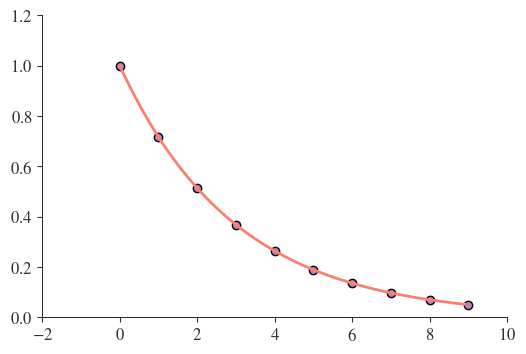

In [42]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, kind='cubic')
# Create a finer grid to interpolation function f
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

What about unstructured data? Let's create a Cobb-Douglas function on a detailed grid but then only retain a random set of the established points.

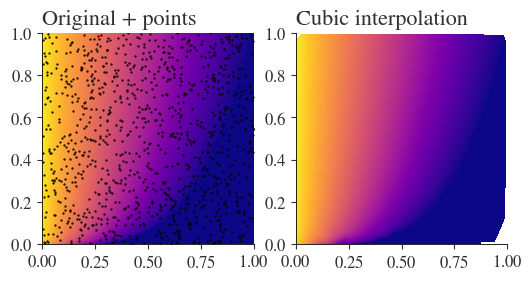

In [43]:
from scipy.interpolate import griddata

def cobb_doug(x, y):
    alpha = 0.8
    return x**(alpha)*y**(alpha-1)


# Take some random points of the Cobb-Douglas function
points = np.random.rand(1000, 2)
values = cobb_doug(points[:,0], points[:,1])

# Create a grid
grid_x, grid_y = np.mgrid[0.01:1:200j, 0.01:1:200j]

# Interpolate the points we have onto the grid
interp_data = griddata(points, values, (grid_x, grid_y), method='cubic')

# Plot results
fig, axes = plt.subplots(1, 2)
# Plot function & scatter of random points
axes[0].imshow(cobb_doug(grid_x, grid_y).T,
               extent=(0, 1, 0, 1),
               origin='lower', cmap='plasma_r',
               vmin=0, vmax=1)
axes[0].plot(points[:, 0], points[:, 1], 'r.', ms=1.2)
axes[0].set_title('Original + points')
# Interpolation of random points
axes[1].imshow(interp_data.T, extent=(0, 1, 0, 1),
               origin='lower', cmap='plasma_r',
               vmin=0, vmax=1)
axes[1].set_title('Cubic interpolation');

### Optimisation

**scipy** has functions for minimising scalar functions, minimising multivariate functions with complex surfaces, and root-finding. Let's see an example of finding the minimum of a scalar function.

In [44]:
from scipy import optimize

def f(x):
    return x**2 + 10*np.sin(x) - 1.2


result = optimize.minimize(f, x0=0)
result

      fun: -9.145823375615207
 hess_inv: array([[0.08589248]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

The result of the optimisation is in the 'x' attribute of `result`. Let's see this:

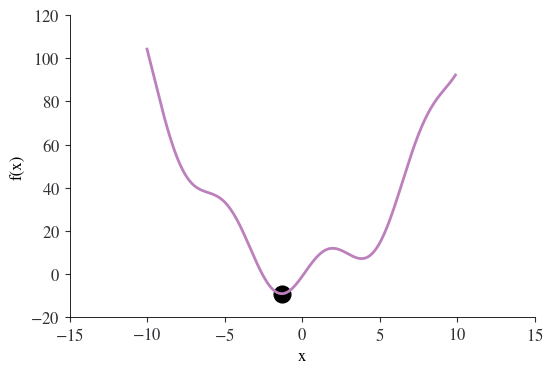

In [45]:
x = np.arange(-10, 10, 0.1)
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.scatter(result.x, f(result.x), s=150, color='k')
ax.set_xlabel('x')
ax.set_ylabel('f(x)', rotation=90)
plt.show()

In higher dimensions, the minimisation works in much the same way, with the same function `optimize.minimize`. There are a LOT of minimisation options that you can pass to the `method=` keyword; the default is intelligently chosen from BFGS, L-BFGS-B, or SLSQP, depending upon whether you supply constraints or bounds.

Root finding, aka solving equations of the form $f(x)=0$, is also catered for by **scipy**, through `optimize.root`. It works in much the same way as `optimizer.minimize`.

In both of these cases, be warned that multiple roots and multiple minima can be hard to detect, and you may need to carefully specify the bounds or the starting positions in order to find the root you're looking for. Also, both of these methods can accept the Jacobian of the function you're working with as an argument, which is likely to improve performance with some solvers.

### Numerical Integration

**scipy** provides routines to numerically evaluate integrals in `scipy.integrate`, which you can find the documentation for [here](https://docs.scipy.org/doc/scipy/reference/integrate.html). Let's see an example using the 'vanilla' integration method, `quad`, to solve a known function between given (numerical) limits:

$$
\displaystyle\int_0^{\pi} \sin(x) d x
$$

In [46]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi)
res

2.0

What if we just have data samples? In that case, there are several routines that perform purely numerical integration:

In [47]:
from scipy.integrate import simps
x = np.arange(0, 10)
f_of_x = np.arange(0, 10)

simps(f_of_x, x) - 9**2/2

0.0

Even with just 10 evenly spaced points, the composite Simpson’s rule integration given by `simps` is able to accurately find the answer as $\left( x^2/2\right) |_{0}^{9}$.

## Advanced: Composable Function Transformations

In recent years, there have been great developments in the ability of Python to easily carry out numerical 'composable function transformations'. What this means is that, if you can dream up an arbitrary numerical operations -- including differentiation, linear algebrea, and optimisation -- you can write code that will execute it quickly and automatically on CPUs, GPUs, or TPUs as you like.

Here we'll look at one library that does this, **jax**, developed by Google {cite}`jax2018github`. It can automatically differentiate native Python and **numpy** functions, including when they are in loops, branches, or subject to recursion, and it can take derivatives of derivatives of derivatives. It supports reverse-mode differentiation (a.k.a. backpropagation) via grad as well as forward-mode differentiation, and the two can be composed arbitrarily to any order.

To do these at speed, it uses just-in-time compilation. If you don't know what that is, don't worry: the details aren't important. It's just a way of getting close to C++ or Fortran speeds while still being able to write code in *much* more user friendly Python!

### Auto-differentiation

Let's see an example of auto-differentiation an arbitrary function. We'll write the definition of $\tanh(x)$ as a function and evaluate it. Because we already imported a (symbolic) `tanh` function from Sympy above, we'll call the function below `tanh_num`.

In [48]:
from jax import grad
import jax.numpy as jnp

def tanh_num(θ):  # Define a function
  y = jnp.exp(-2.0 * θ)
  return (1.0 - y) / (1.0 + y)

grad_tanh = grad(tanh_num)  # Obtain its gradient function
grad_tanh(1.0)   # Evaluate it at x = 1.0

DeviceArray(0.4199743, dtype=float32)

You can differentiate to any order using grad:

In [49]:
grad(grad(grad(tanh_num)))(1.0)

DeviceArray(0.6216266, dtype=float32)

Let's check this using symbolic mathematics:

In [50]:
θ = Symbol(r'\theta')
triple_deriv = diff(diff(diff(tanh(θ), θ)))
triple_deriv

(1 - tanh(\theta)**2)*(2*tanh(\theta)**2 - 2) + 2*(2 - 2*tanh(\theta)**2)*tanh(\theta)**2

In [51]:
symp_est = triple_deriv.subs(θ, 1.)
glue('symp_est', f'{symp_est:.3f}')

'0.622'

If we evaluate this at $\theta=1$, we get {glue:}`symp_est`. This was a simple example that had a (relatively) simple mathematical expression. But imagine if we had lots of branches (eg if, else statements), and/or a really complicated function: **jax**'s grad would still work. It's designed for really complex derivatives of the kind encountered in machine learning.

### Just-in-time compilation

The other nice feature of **jax** is the ability to do just-in-time (JIT) compilation. Because they do not compile their code into machine-code before running, high-level languages like Python and R are not as fast as the same code written in C++ or Fortran (the benefit is that it takes you less time to write the code in the first place). Much of the time, there are pre-composed functions that call C++ under the hood to do these things--but only for those operations that people have already taken the time to code up in a lower level language. JIT compilation offers a compromise: you can code more or less as you like in the high-level language but it will be compiled just-in-time to give you a speed-up!

**jax** is certainly not the only Python package that does this, and if you're not doing anything like differentiating or propagating, **numba** is a more mature alternative. But here we'll see the time difference for JIT compilation on an otherwise slow operation: element wise multiplication and addition.

In [52]:
from jax import jit

def slow_f(x):
  """Slow, element-wise function"""
  return x * x + x * 2.0

x = jnp.ones((5000, 5000))
fast_f = jit(slow_f)

Now let's see how fast the 'slow' version goes:

In [53]:
%timeit -n15 -r3 slow_f(x)

87.5 ms ± 14.2 ms per loop (mean ± std. dev. of 3 runs, 15 loops each)


what about with the JIT compilation?

In [54]:
%timeit -n15 -r3 fast_f(x)

22.7 ms ± 666 µs per loop (mean ± std. dev. of 3 runs, 15 loops each)


This short introduction has barely scratched the surface of **jax** and what you can do with it. For more, see the [official documentation](https://jax.readthedocs.io/en/latest/).

## Set theory

Set theory is a surprisingly useful tool in research (and invaluable in spatial analysis). Here are some really useful bits of set theory inspired by examples in {cite}`sheppard2012introduction`.

Sets are first class citizens in Python in the same way that lists are. We can define and view a set like this:

In [55]:
x = set(['Ada Lovelace', 'Sadie Alexander',
         'Charles Babbage', 'Ada Lovelace',
         'Adam Smith', 'Sadie Alexander'])
x

{'Ada Lovelace', 'Adam Smith', 'Charles Babbage', 'Sadie Alexander'}

Notice that a couple of entries appeared twice in the list but only once in the set: that's because a set contains only unique elements. Let's define a second set in order to demonstrate some of the operations we can perform on sets.

In [56]:
y = set(['Grace Hopper', 'Jean Bartik',
         'Janet Yellen', 'Joan Robinson',
         'Adam Smith', 'Ada Lovelace'])
y

{'Ada Lovelace',
 'Adam Smith',
 'Grace Hopper',
 'Janet Yellen',
 'Jean Bartik',
 'Joan Robinson'}

In [57]:
from myst_nb import glue
inters = x.intersection(y)
differ = x.difference(y)
union = x.union(y)
glue("inters", inters)
glue("differ", differ)
glue("union", union)

{'Ada Lovelace', 'Adam Smith'}

{'Charles Babbage', 'Sadie Alexander'}

{'Ada Lovelace',
 'Adam Smith',
 'Charles Babbage',
 'Grace Hopper',
 'Janet Yellen',
 'Jean Bartik',
 'Joan Robinson',
 'Sadie Alexander'}

Now we have two sets we can look at to demonstrate some of the basic functions you can call on the set object type. `x.intersection(y)` gives, in this example, {glue:}`inters`, `x.difference(y)` gives {glue:}`differ`, and `x.union(y)` gives {glue:}`union`.

**numpy** also has functions that use set theory. `np.unique` returns only the unique entries of an input array or list:

In [58]:
np.unique(['Lovelace', 'Hopper', 'Alexander', 'Hopper', 45, 27, 45])

array(['27', '45', 'Alexander', 'Hopper', 'Lovelace'], dtype='<U9')

We can also ask which of a second set is a repeat of a first:

In [59]:
x = np.arange(10)
y = np.arange(5, 10)
np.in1d(x, y)

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

And we have the numpy equivalents of intersection, `np.intersect1d(x, y)`, difference, `np.setdiff1d(x, y)`, and union, `np.union1d(x, y)`. Additionally, there is the exclusive-or (that I like to call 'xor'). This effectively returns the two arrays with their union removed:

In [60]:
a = np.array([1, 2, 3, 2, 4])
b = np.array([2, 3, 5, 7, 5])
np.setxor1d(a,b)

array([1, 4, 5, 7])

## Review

In this chapter, you should have:

- ✅ seen how to use symbolic algebra with code, including Lagrangrians and linear algebra;
- ✅ seen how to code numerical mathematics, including linear algebra and optimisation; and
- ✅ found out about using set theory via the `set` object type and set-oriented functions.